In [88]:
import numpy as np
import pandas as pd

In [89]:
import pandas as pd

df=pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3725,ham,No chikku nt yet.. Ya i'm free,NaN,NaN,NaN
1242,ham,Nobody can decide where to eat and dad wants C...,NaN,NaN,NaN
4040,spam,Please call our customer service representativ...,NaN,NaN,NaN
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...,NaN,NaN,NaN
4119,ham,Babe! How goes that day ? What are you up to ?...,NaN,NaN,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [91]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [92]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [93]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [94]:
df.rename(columns={'v1'	:'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [95]:
df.duplicated().sum()

403

In [96]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [97]:
df['target'] = encoder.fit_transform(df['target'])

In [98]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [99]:
df.duplicated().sum()

403

In [100]:
df=df.drop_duplicates(keep='first')

In [101]:
df.duplicated().sum()

0

In [102]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

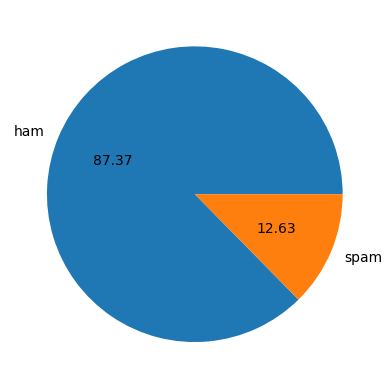

In [103]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [104]:
df['text'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [105]:
import nltk.data
import nltk.tokenize

In [106]:
df['no_char']=df['text'].apply(len)

<ipython-input-106-8a309a29edbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_char']=df['text'].apply(len)


In [107]:
df

,target,text,no_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [108]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [109]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
v = nltk.word_tokenize('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [111]:
v

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [112]:
df['no_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-112-2fa8431fbb6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [113]:
df['no_word']=df['text'].apply(lambda x:len(nltk.tokenize.word_tokenize(x)))
df

<ipython-input-113-1b16e7676c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_word']=df['text'].apply(lambda x:len(nltk.tokenize.word_tokenize(x)))


,target,text,no_char,no_sent,no_word
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15
5570,0,The guy did some bitching but I acted like i'd...,125,1,27


In [114]:
df[['no_char','no_sent','no_word']].describe()

,no_char,no_sent,no_word
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [115]:
df[df['target']==1][['no_char','no_sent','no_word']].describe()


,no_char,no_sent,no_word
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [116]:
df[df['target']==0][['no_char','no_sent','no_word']].describe()

,no_char,no_sent,no_word
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [117]:
import seaborn as sns

<Axes: xlabel='no_char', ylabel='Count'>

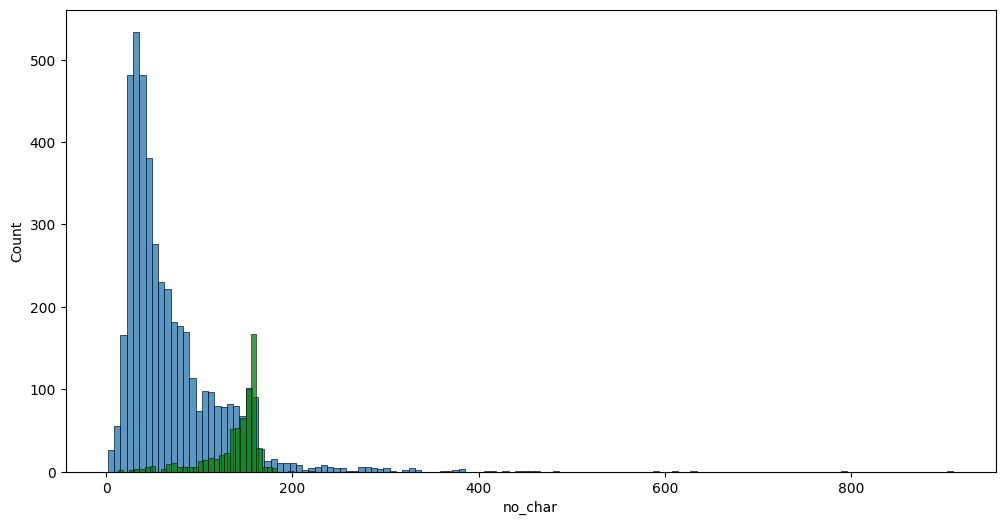

In [118]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['no_char'])
sns.histplot(df[df['target']==1]['no_char'],color='green')

<Axes: xlabel='no_word', ylabel='Count'>

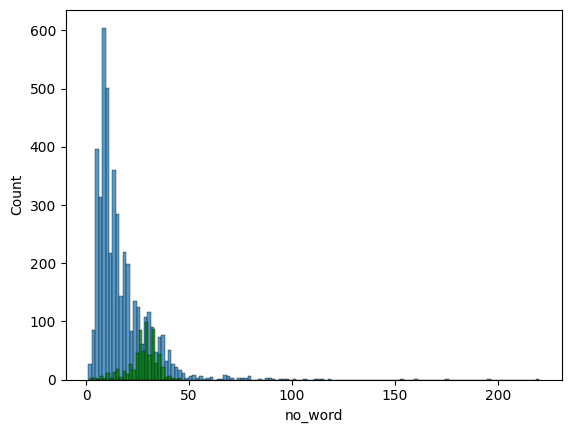

In [119]:
sns.histplot(df[df['target']==0]['no_word'])
sns.histplot(df[df['target']==1]['no_word'],color='green')

<Axes: xlabel='no_sent', ylabel='Count'>

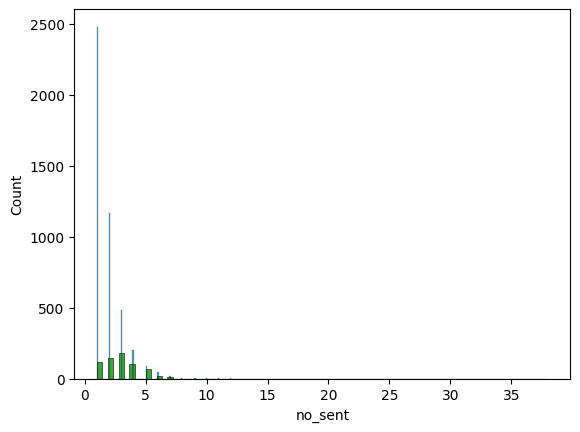

In [120]:
sns.histplot(df[df['target']==0]['no_sent'])
sns.histplot(df[df['target']==1]['no_sent'],color='green')

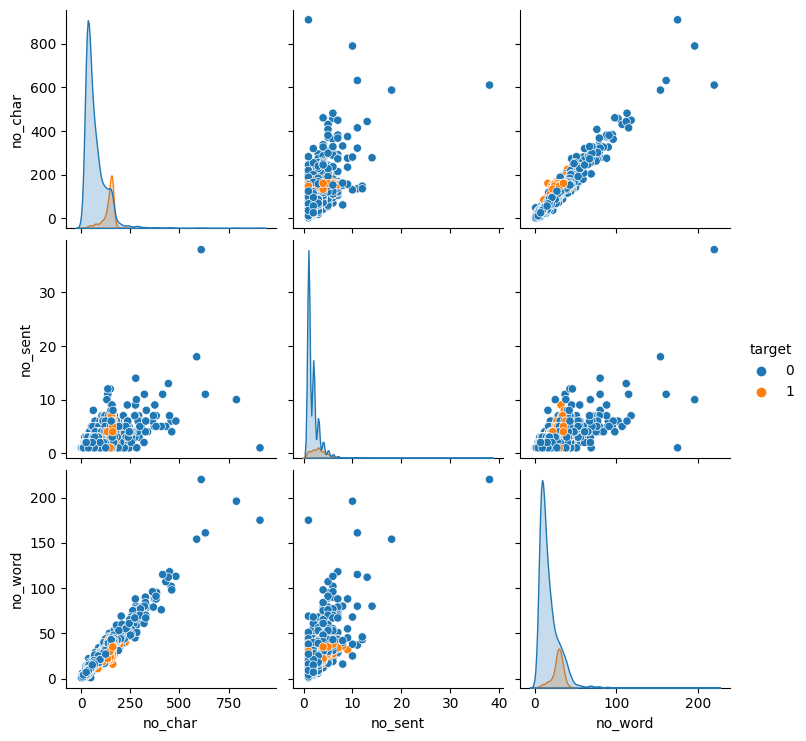

In [121]:
sns.pairplot(df,hue='target')

<ipython-input-122-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

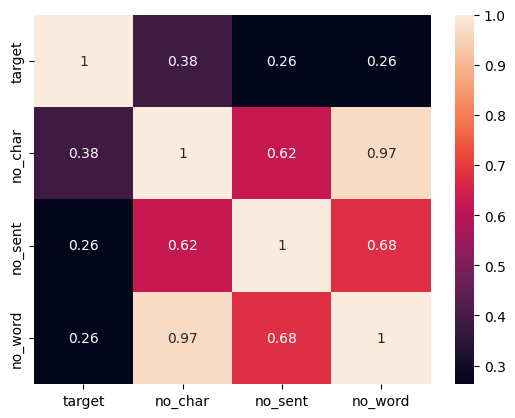

In [122]:
sns.heatmap(df.corr(),annot=True)

In [123]:

import re
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [125]:
def transform_txt(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  a=[]
  for i in y:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
      a.append(i)
  res=[]
  for i in a:
    res.append(ps.stem(i))
  return " ".join(res);






In [126]:
x="hello iam himansu ,iam 22 year,the things i want is now faraway,know one thing ,loving a girl is crime"
print(transform_txt(x))

hello iam himansu iam 22 year thing want faraway know one thing love girl crime


In [127]:
df['transformed_text']=df['text'].apply(transform_txt)

<ipython-input-127-c80c09b70aaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_txt)


In [128]:
df

,target,text,no_char,no_sent,no_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,1,27,guy bitch act like interest buy someth els nex...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int64 
 1   text              5169 non-null   object
 2   no_char           5169 non-null   int64 
 3   no_sent           5169 non-null   int64 
 4   no_word           5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 411.7+ KB


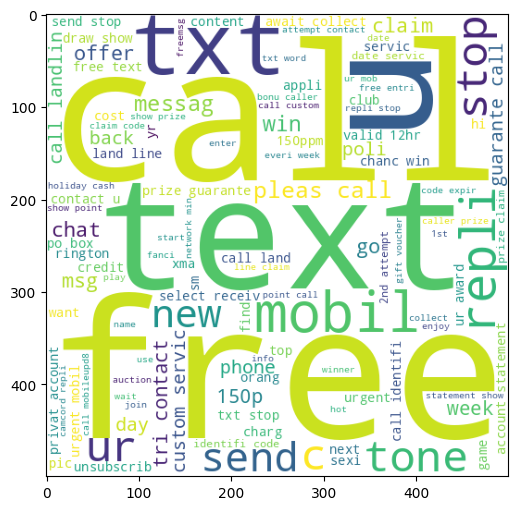

In [130]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

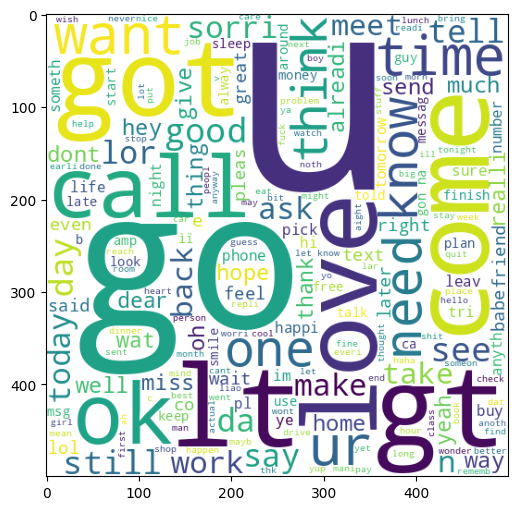

In [131]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [132]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [133]:
df

,target,text,no_char,no_sent,no_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,1,27,guy bitch act like interest buy someth els nex...


model building


In [134]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [135]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
y=df['target']

In [137]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [139]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [145]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [147]:
res={
   'svc':svc,
   'knn':knc,
   'mnb':mnb,
   'dtc':dtc,
  'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbdt':gbdt,
    'xgb':xgb
}

In [148]:
def check(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  y_pred=alg.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  preci=precision_score(y_test,y_pred)
  return accuracy,preci


In [149]:
check(mnb,x_train,x_test,y_train,y_test)

(0.9709864603481625, 1.0)

In [150]:
ac=[]
pr=[]
for i,j in res.items():
  a,p=check(j,x_train,x_test,y_train,y_test)
  print('for',i)
  print('accuracy',a)
  print('precision',p)
  ac.append(a)
  pr.append(p)


for svc
accuracy 0.9758220502901354
precision 0.9747899159663865
for knn
accuracy 0.9052224371373307
precision 1.0
for mnb
accuracy 0.9709864603481625
precision 1.0
for dtc
accuracy 0.9332688588007737
precision 0.8415841584158416
for lrc
accuracy 0.9584139264990329
precision 0.9702970297029703
for rfc
accuracy 0.9758220502901354
precision 0.9829059829059829
for abc
accuracy 0.960348162475822
precision 0.9292035398230089
for bc
accuracy 0.9584139264990329
precision 0.8682170542635659
for etc
accuracy 0.9748549323017408
precision 0.9745762711864406
for gbdt
accuracy 0.9468085106382979
precision 0.9191919191919192
for xgb
accuracy 0.9671179883945842
precision 0.9262295081967213


In [151]:
p_df = pd.DataFrame({'Algorithm':res.keys(),'Accuracy':ac,'Precision':pr}).sort_values('Precision',ascending=False)

In [152]:
p_df

,Algorithm,Accuracy,Precision
1,knn,0.905222,1.000000
2,mnb,0.970986,1.000000
5,rfc,0.975822,0.982906
0,svc,0.975822,0.974790
8,etc,0.974855,0.974576
4,lrc,0.958414,0.970297
6,abc,0.960348,0.929204
10,xgb,0.967118,0.926230
9,gbdt,0.946809,0.919192
7,bc,0.958414,0.868217


In [153]:
performance_df1 = pd.melt(p_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,knn,Accuracy,0.905222
1,mnb,Accuracy,0.970986
2,rfc,Accuracy,0.975822
3,svc,Accuracy,0.975822
4,etc,Accuracy,0.974855
5,lrc,Accuracy,0.958414
6,abc,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,gbdt,Accuracy,0.946809
9,bc,Accuracy,0.958414


In [154]:
import seaborn as sns

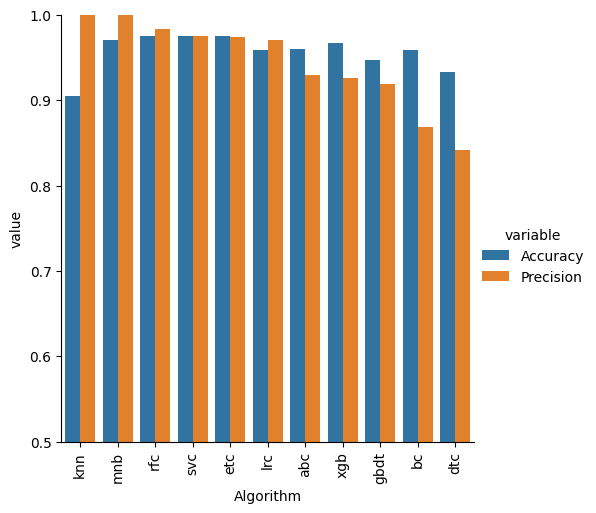

In [155]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [156]:
from sklearn.ensemble import VotingClassifier

In [157]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [158]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rfc', etc)],voting='soft')

In [159]:
voting

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [160]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [161]:
y_pre= voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pre))
print("Precision",precision_score(y_test,y_pre))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [162]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

In [163]:
from sklearn.ensemble import StackingClassifier

In [164]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [165]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [168]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [173]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mdl.pkl','wb'))